# Import libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Generate a Sine Oscillator

In [4]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 440        # frequency to generate, you can change the frequency 


x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs - np.pi/3)

ipd.Audio(x, rate=fs)



# Plot the Sine Oscillator

Text(0.5, 0, 'sec')

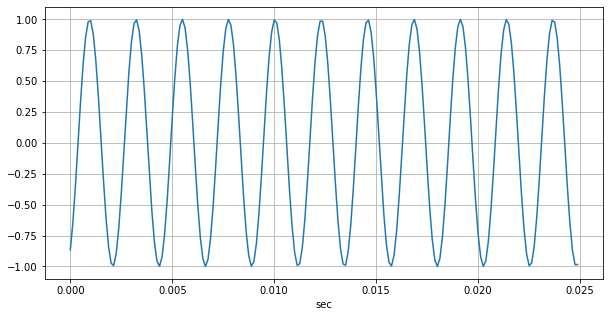

In [5]:
plt.figure(figsize=(10, 5))

n= np.arange(200)

plt.plot(n/fs, x[:200],)
plt.grid(True)
plt.xlabel('sec')


# Plot the in-phase and quadrature compoponents



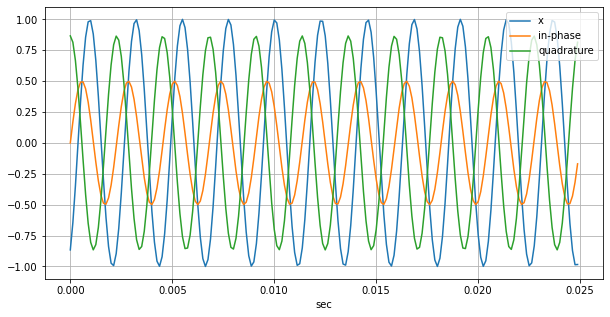

In [6]:
x_in = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)
x_quad = np.cos(2*np.pi*f0*np.arange(dur*fs)/fs)

A1= np.sin(np.pi/6)
A2= np.cos(np.pi/6)


plt.figure(figsize=(10, 5))

n= np.arange(200)

plt.plot(n/fs, x[:200])
plt.plot(n/fs, A1*x_in[:200])
plt.plot(n/fs, A2*x_quad[:200])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['x','in-phase','quadrature'])


# Fourier Series and Addivie Synthesis

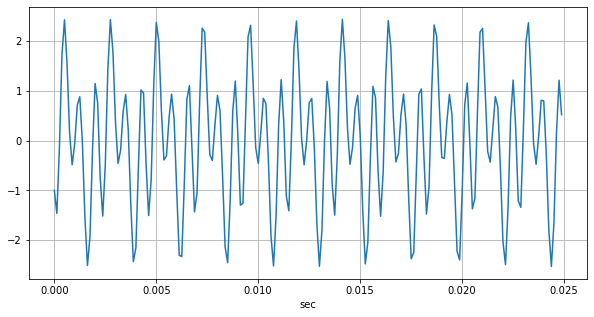

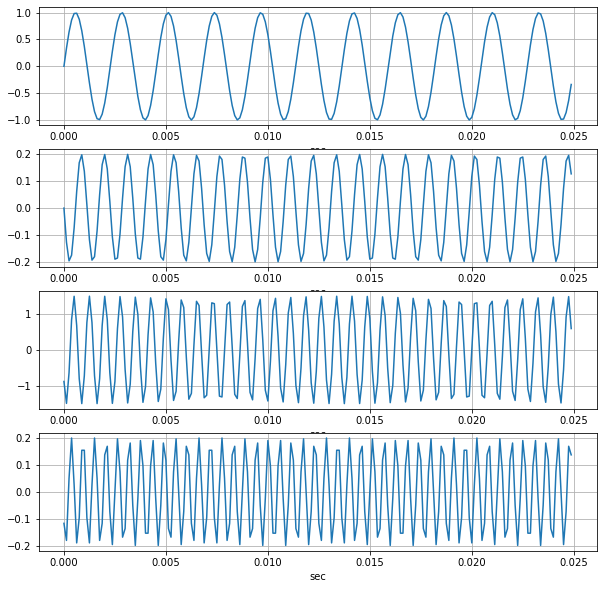

In [7]:
fs = 8000       # sampling rate
dur = 1         # duration, 1 second
f0 = 440        # fundamental frequency to play 


# You can adjust the amplitude and phase of harmonic partials
# Also, you can add more harmonic partials
x1 = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs + 0)
x2 = 0.2*np.sin(2*np.pi*f0*2*np.arange(dur*fs)/fs - np.pi*2*0.5)
x3 = 1.5*np.sin(2*np.pi*f0*3*np.arange(dur*fs)/fs + np.pi*2*0.6)
x4 = 0.2*np.sin(2*np.pi*f0*4*np.arange(dur*fs)/fs - np.pi*2*0.4)


x = x1+x2+x3+x4


plt.figure(figsize=(10, 5))

n= np.arange(200)
plt.plot(n/fs, x[:200])
plt.grid(True)
plt.xlabel('sec')


plt.figure(figsize=(10, 10))
plt.subplot(4,1,1)
plt.plot(n/fs, x1[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,2)
plt.plot(n/fs, x2[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,3)
plt.plot(n/fs, x3[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,4)
plt.plot(n/fs, x4[:200])
plt.grid(True)
plt.xlabel('sec')



ipd.Audio(x, rate=fs)



# Sawtooth and Sqaure Oscillators

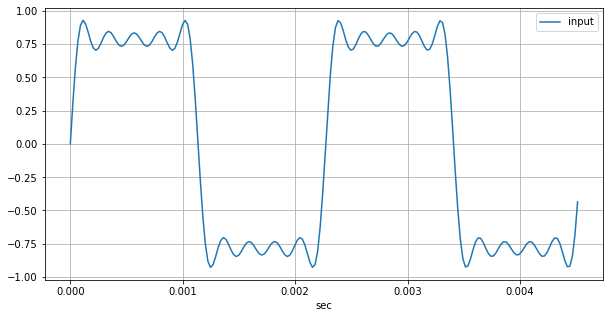

In [8]:

def sawtooth(f0, dur, N, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency
# N:   number of harmonics to generate

    # fundamental mode
    x = -np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

    # adding harmonic modes
    for n in range(N-1):
        x = x + np.power(-1,n+2)/(n+2)*np.sin(2*np.pi*(n+2)*f0*np.arange(dur*fs)/fs)

    return x


def sqaure(f0, dur, N, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency
# N:   number of harmonics to generate

    # fundamental mode
    x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

    # adding harmonic modes
    for n in range(N-1):
        if np.mod(n+2,2):
            x = x + 1/(n+2)*np.sin(2*np.pi*(n+2)*f0*np.arange(dur*fs)/fs)

    return x



#x = sawtooth(440, 1, 10, 44100)
fs = 44100
x = sqaure(440, 1, 10, fs)
        
plt.figure(figsize=(10, 5))

n= np.arange(200)

plt.plot(n/fs, x[:200],)
plt.grid(True)
plt.xlabel('sec')
plt.legend(['input'])

ipd.Audio(x, rate=fs)


# Let's Play Music 

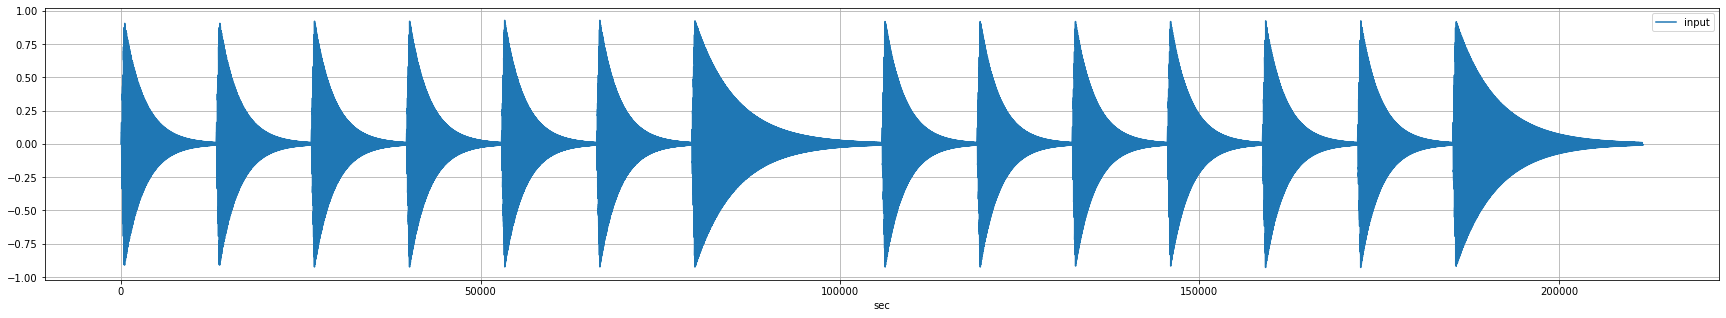

In [9]:
# sampling rate
fs = 44100


# MIDI note number: C4=60, C5=72, ... 
notes = [60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
note_legnths = [1,1,1,1,1,1,2,1,1,1,1,1,1,2]

# envelope
attack_time = 0.01 # second

x = []
for i in range(len(notes)):    
    # fundamental frequency
    f0= 440*np.power(2.0,(notes[i]-69)/12)

    # generate oscillator
    x_note = sqaure(f0, note_legnths[i]*0.3, 10, fs)

    # amplitude envelope
    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(0.01),len(x_note)-len(env_attack))
    env = np.append(env_attack, env_decay)

    # apply the ampltidue envelope
    x_note_env = np.multiply(x_note, env)
    
    # concatenate notes
    x = np.append(x, x_note_env)
    

plt.figure(figsize=(30, 5))

plt.plot(x)
plt.grid(True)
plt.xlabel('sec')
plt.legend(['input'])

ipd.Audio(x, rate=fs)